# House-Prices-one-hot-encoded version

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from pandas import DataFrame
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


#그래프에서 격자로 숫자가 잘보이기 위해 ggplot스타일 사용
plt.style.use(style='ggplot')

%matplotlib inline

In [2]:
train = pd.read_csv("C:/Users/sangkyu/git/kaggle/intput/train.csv")
test = pd.read_csv("C:/Users/sangkyu/git/kaggle/intput/test.csv")

In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
train.head()
#train파일에는 SalePrice가 포함되어 있다.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()
#test 파일에는 SalePrice가 포함되어 있지 않다.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_info = train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [8]:
missing_value = train.isnull().sum()
missing_value

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

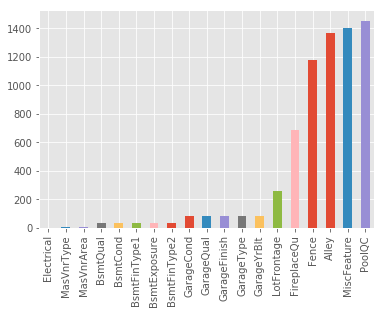

In [9]:
missing_value = missing_value[missing_value>0]
missing_value.sort_values(inplace = True)
missing_value.plot.bar()
missing_value


전체 feature들중 총 19개의 데이터에 결측치가 존재한다. PoolQC는 Pool Quality로 3개의 데이터빼고는 모두 결측치이다.

Skew is: 1.8828757597682129


C:\Users\sangkyu\Anaconda3\envs\git\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


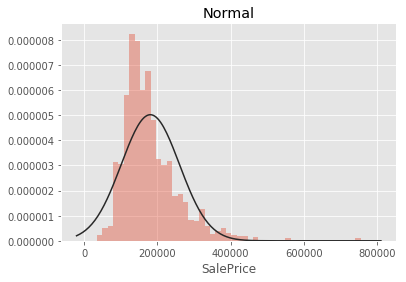

In [10]:
import scipy.stats as st
print("Skew is:", train.SalePrice.skew())
y = train['SalePrice']
sns.distplot(y,kde=False, fit=st.norm)
plt.title("Normal")
plt.show()

최종 예측을 위한 타겟인 SalePrice의 데이터 분포이다. 그래프를 보면 한쪽으로 치우쳐져 있는데 skew : 1.88로 편향된 것을 볼 수 있다.

Skew is: 1.8828757597682129


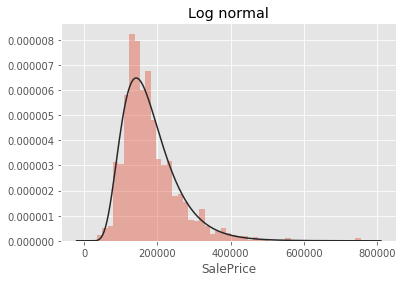

In [11]:
print("Skew is:", y.skew())
sns.distplot(y,kde=False, fit=st.lognorm)
plt.title("Log normal")
plt.show()

데이터에 log를 씌움 skew : 1.21으로 편향된 것을 어느정도 잡은 것을 볼 수 있다.

In [12]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Categorical, Numerical feature들 나누기

In [13]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [14]:
categoric_features = train.select_dtypes(exclude=[np.number])
categoric_features.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [15]:
# 데이터를 좀 더 직관적으로 보기위해 melt
melt = pd.melt(train,value_vars=numeric_features)
melt.head()

,variable,value
0,Id,1.0
1,Id,2.0
2,Id,3.0
3,Id,4.0
4,Id,5.0


pd.melt는 주로 데이터 전처리에 많이 쓰이는데 ID 변수를 기준으로 원래 데이터셋에 있던 여러개의 칼럼 이름을 'variable' 칼럼에 위에서 아래로 길게 쌓아놓고, 'value' 칼럼에 ID와 variable에 해당하는 값을 넣어주는 식으로 데이터를 재구조화합니다.

* 출처: https://rfriend.tistory.com/tag/pd.melt() [R, Python 분석과 프로그래밍 (by R Friend)]

여기서는 train데이터셋에 있는 numerical feature들을 value column에 삽입하고, 이에 해당하는 label들을 variable에 삽입 하였습니다.

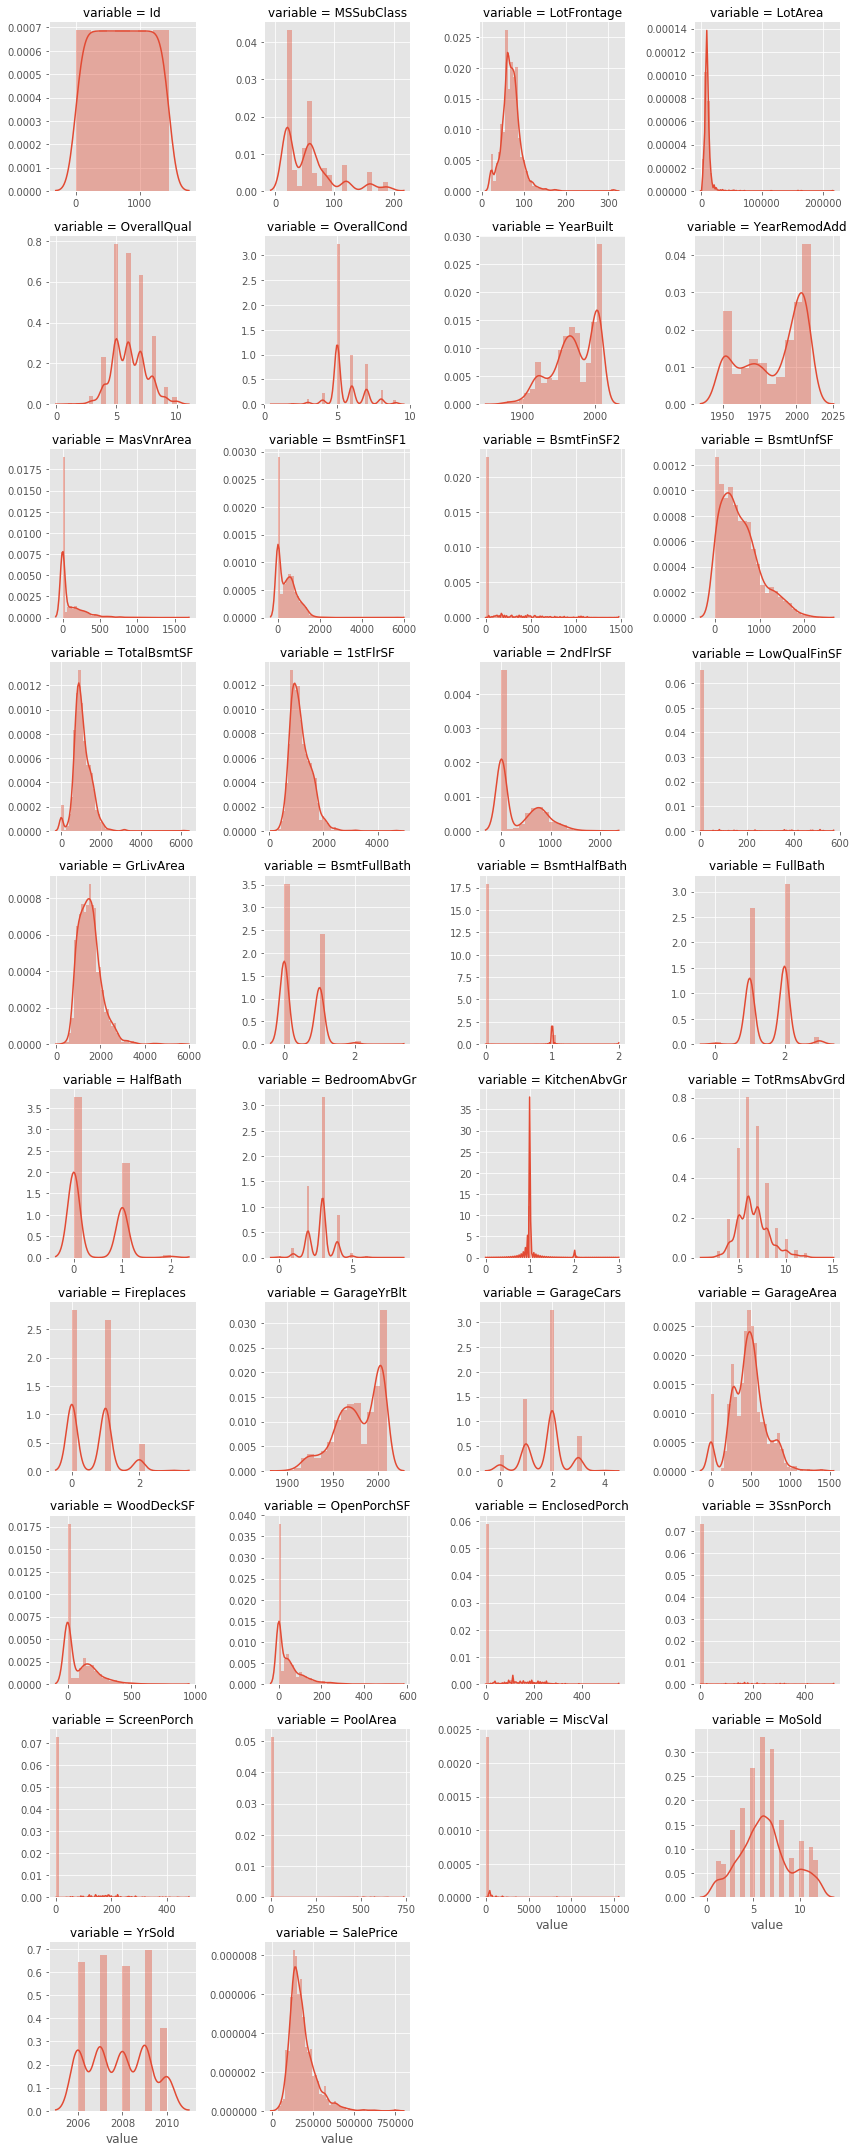

In [16]:
# facetgrid에는 많은 옵션이 있는데 column,row,hue label을 스스로 지정할 수 있음, 또 col_wrap값을 조절 함으로써 시각화 할때 가로로 몇 개
# 의 데이터를 표현 할지 정할 수 있음. sharex,y는 False로 지정해 주지 않으면 표가 매우 작게 나왔음.
g = sns.FacetGrid(melt, col="variable", col_wrap=4, sharex=False,sharey=False)
g = g.map(sns.distplot, 'value')

* LotFrontage,LotArea,TotalBsmtSF,1stFlrSF,GrLivArea, KitchenAbvGr등과 같은 독립변수들은 log변환하면 정규분포를 이룰 것 같다.

# 데이터의 회귀분석 
* 출처 : https://datascienceschool.net/view-notebook/2787ec5d30664dea850fe0a940e5c1e4/

# seaborn 
데이터 시각화 패키지인데 matplotlib보다 좀더 세밀한 기능이 있어 공부해 놓으면 나중에 데이터 시각화에 좋을 것 같다.

* 출처 : https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

In [17]:
categoric_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

categorical한 특징들을 분석해서 dummy_variable(one-hot-encoding) 또는 label-encoding이 필요한지 구별해야 한다.

Ordinal features are categorical values that can be sorted, like clothes size: S, M, L, XL.
Nominal features do not imply any order, like countries: Germany, Belgium, Estonia etc.

You would want to create dummy variables (one-hot encoding) for nominal features and use LabelEncoder to encode ordinal features.

In [18]:
for f in categoric_features:
    print(categoric_features[f].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
[nan 'Grvl' 'Pave']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng

데이터를 확인해 보니 label-encoding은 필요없을것 같다. 데이터셋의 categorical한 feature들에 one-hot-encoding을 적용하겠다.

In [19]:
enc_train = pd.get_dummies(train, columns=categoric_features.columns)
enc_test = pd.get_dummies(test, columns=categoric_features.columns)

In [33]:
prinenc_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=290)

In [20]:
final_train, final_test = enc_train.align(enc_test,join='left',axis=1)

In [21]:
data = final_train.select_dtypes(include=[np.number]).interpolate().dropna()

In [22]:
sum(data.isnull().sum() != 0)

0

In [23]:
y = np.log(final_train.SalePrice)
X = data.drop(['SalePrice','Id'], axis=1)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.33)

In [25]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [26]:
model = lr.fit(X_train,y_train)

In [27]:
print("R^2 is: \n",model.score(X_test, y_test))

R^2 is: 
 0.8964940308377587


In [28]:
predictions = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error
print('RMSE is: \n', mean_squared_error(y_test,predictions))

RMSE is: 
 0.017640665505667036


In [30]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [31]:
feats = test.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

In [32]:
predictions = model.predict(feats)

ValueError: shapes (1459,36) and (288,) not aligned: 36 (dim 1) != 288 (dim 0)

In [ ]:
final_predictions = np.exp(predictions)

In [ ]:
print("original",predictions[:], "\n")
print("Final", final_predictions)

In [ ]:
submission['SalePrice'] = final_predictions
submission.head()